In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("JobSurveyIndia.csv")
df = df.iloc[:,1:]

In [ ]:
#About Data
#A Survey was conducted on wherein students of Indian Colleges answered some questions regarding their Employment expectations after graduating. 
#Data Was Collected via Google Forms Online.
#The Data is primarily based on Choices Of Delhi Students .

In [3]:

df

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...
395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


In [4]:
#checking our dataset

In [5]:
df.shape

(400, 6)

In [6]:
df.size

2400

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employment Sector      400 non-null    object 
 1   Employment Background  400 non-null    object 
 2   Public Dealing         400 non-null    object 
 3   Degree                 400 non-null    object 
 4   IdealNumberOfWorkdays  400 non-null    float64
 5   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), object(5)
memory usage: 18.9+ KB


In [8]:
df.describe()

,IdealNumberOfWorkdays
count,400.000000
mean,4.902500
std,0.805989
min,4.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,7.000000


In [9]:
df.duplicated().sum()

361

In [10]:
#there are 361 duplicates
#However dataset naturally contains duplicate rows due to non-unique combinations of features, 
#removing duplicates could lead to data loss. We will retail the duplicates

In [11]:
#checking the dtype of columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employment Sector      400 non-null    object 
 1   Employment Background  400 non-null    object 
 2   Public Dealing         400 non-null    object 
 3   Degree                 400 non-null    object 
 4   IdealNumberOfWorkdays  400 non-null    float64
 5   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), object(5)
memory usage: 18.9+ KB


In [13]:
#there are no null values in the dataset

In [14]:
df.IdealNumberOfWorkdays.unique()

array([4., 6., 5., 7.])

In [15]:
df.IdealNumberOfWorkdays = df.IdealNumberOfWorkdays.astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employment Sector      400 non-null    object
 1   Employment Background  400 non-null    object
 2   Public Dealing         400 non-null    object
 3   Degree                 400 non-null    object
 4   IdealNumberOfWorkdays  400 non-null    int32 
 5   IdealYearlyIncome      400 non-null    object
dtypes: int32(1), object(5)
memory usage: 17.3+ KB


In [17]:
df['Employment Sector'].unique()

array(['Private Sector', 'Government Sector', 'Entrepreneurship'],
      dtype=object)

In [18]:
df['Employment Background'].unique()

array(['Technical', 'Art ', 'Non-Technical', 'Art'], dtype=object)

In [19]:
#since art is repeated two times, we need to fix it
df['Employment Background']= df['Employment Background'].replace('Art ','Art')
df['Employment Background'].unique()

array(['Technical', 'Art', 'Non-Technical'], dtype=object)

In [20]:
df['Public Dealing'].unique()

array(['No', 'No ', 'Yes'], dtype=object)

In [21]:
#Since no is repeated twice, it needs to be fixed
df['Public Dealing'] = df['Public Dealing'].replace('No ', 'No')
df['Public Dealing'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['Degree'].unique()

array(['Yes', 'Yes ', 'No'], dtype=object)

In [23]:
#here also yes is repeated
df['Degree'] = df['Degree'].replace('Yes ', 'Yes')
df['Degree'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df['IdealYearlyIncome'].unique()

array(['More Than 1500K', '600K-900K', '900K-1200K', '1200K-1500K'],
      dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employment Sector      400 non-null    object
 1   Employment Background  400 non-null    object
 2   Public Dealing         400 non-null    object
 3   Degree                 400 non-null    object
 4   IdealNumberOfWorkdays  400 non-null    int32 
 5   IdealYearlyIncome      400 non-null    object
dtypes: int32(1), object(5)
memory usage: 17.3+ KB


In [26]:
df.describe(include='object')

,Employment Sector,Employment Background,Public Dealing,Degree,IdealYearlyIncome
count,400,400,400,400,400
unique,3,3,2,2,4
top,Government Sector,Non-Technical,No,Yes,900K-1200K
freq,189,222,205,241,162


In [27]:
#the data is preprocessed
#let's perform pandas profiling for better understanding our data

In [28]:
#!pip install ydata-profiling  

In [71]:
#from ydata_profiling import ProfileReport

In [30]:
#prof = ProfileReport(df)

In [31]:
#prof.to_file(output_file = 'JobSurveyIndia.html')   #since the report is generated in html, I will comment it out.

In [32]:
#Univariate Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employment Sector      400 non-null    object
 1   Employment Background  400 non-null    object
 2   Public Dealing         400 non-null    object
 3   Degree                 400 non-null    object
 4   IdealNumberOfWorkdays  400 non-null    int32 
 5   IdealYearlyIncome      400 non-null    object
dtypes: int32(1), object(5)
memory usage: 17.3+ KB


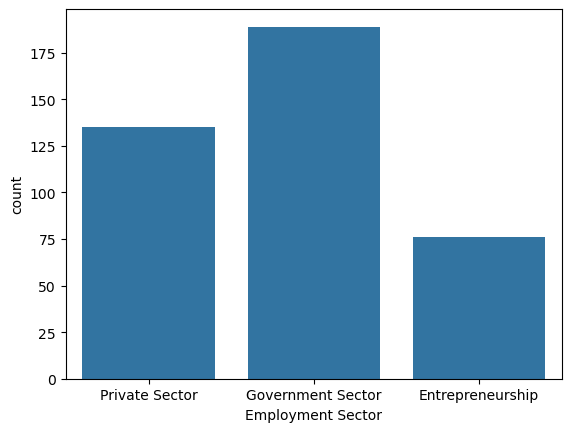

In [34]:
sns.countplot(x=df['Employment Sector'])
plt.show()

In [ ]:
#it can be seen that most no. of the no. of students prefer Government sector, then the private sector and then their own business

<Axes: ylabel='count'>

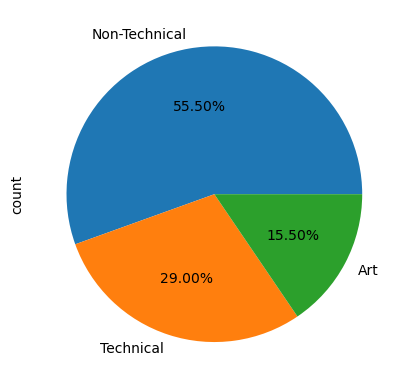

In [75]:
df['Employment Background'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [77]:
#it can be seen that most students prefer non-technical jobs, followed by technical.

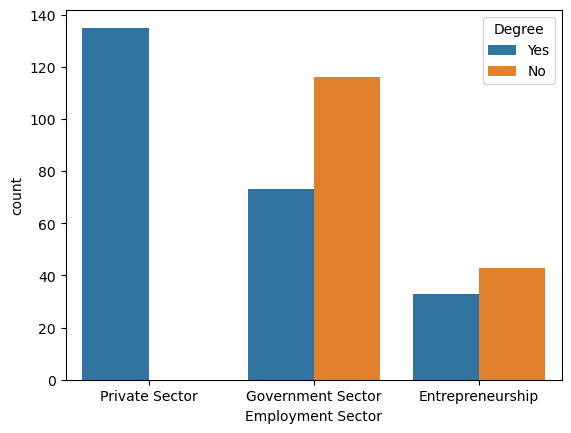

In [177]:
sns.countplot(x=df['Employment Sector'], hue=df['Degree'])
plt.show()

In [83]:
#it can be seen from the above chart that students with no degree do not prefer private sectors, 
#whereas highest no. of degreeholders are interested for private sector.

<Axes: xlabel='Public Dealing', ylabel='count'>

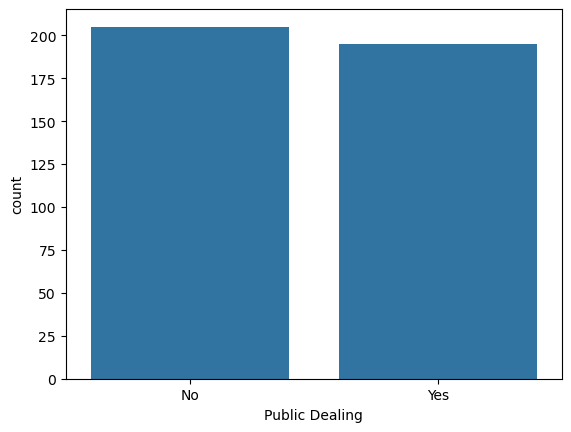

In [97]:
sns.countplot(x=df['Public Dealing'])

In [99]:
#It can be said that there is no huge difference between students preferring jobs that require or do not require public dealing

<Axes: xlabel='count', ylabel='Degree'>

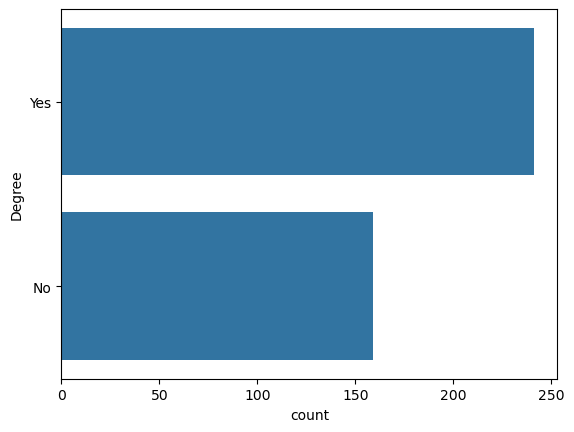

In [101]:
sns.countplot(df['Degree'])

In [179]:
#there are more students with degree in the data

<Axes: xlabel='IdealNumberOfWorkdays', ylabel='Density'>

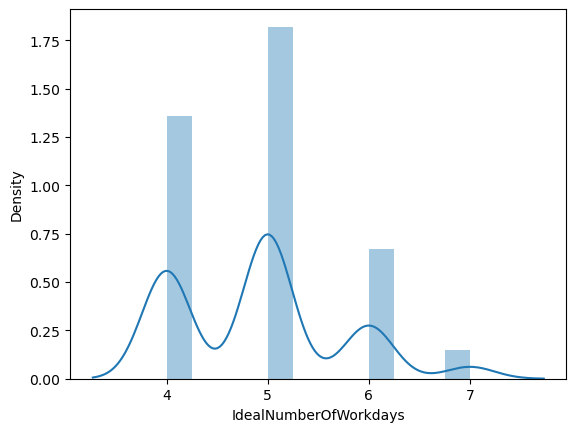

In [121]:
sns.distplot(df['IdealNumberOfWorkdays'])

In [181]:
#it can be seen that ideal no. of working days for most of the students is 5, followed by 4, and the least ideal is 7 days

<Axes: ylabel='count'>

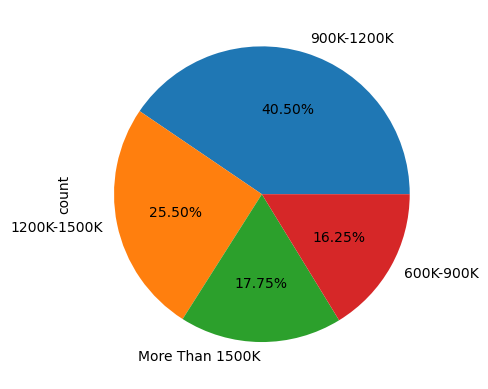

In [131]:
df['IdealYearlyIncome'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [133]:
#It can thus be seen that the ideal income is 900k-1200k as per the 40.50% of students

In [137]:
#Bivariate Analysis and Multivariate Analysis

<Axes: xlabel='Employment Sector', ylabel='IdealNumberOfWorkdays'>

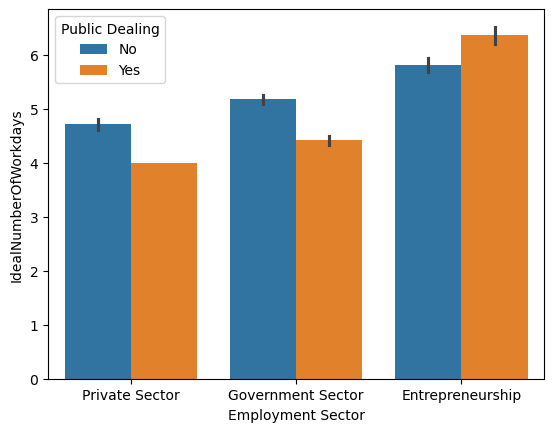

In [151]:
sns.barplot(x=df['Employment Sector'] ,y=df['IdealNumberOfWorkdays'], hue=df['Public Dealing'])

In [257]:
#it can be seen that the students willing to work in private and government sectors prefer to have somewhere between 4-5 workdays whereas 
#for students who prefer entrepreneurship tend to have over 6 ideal workdays
#Another point is that the students who opt for public dealing prefer fewer workdays than those who don't prefer dealing with public, 
#however it is the opposite for entrepreneurs 

<Axes: xlabel='Employment Sector', ylabel='IdealNumberOfWorkdays'>

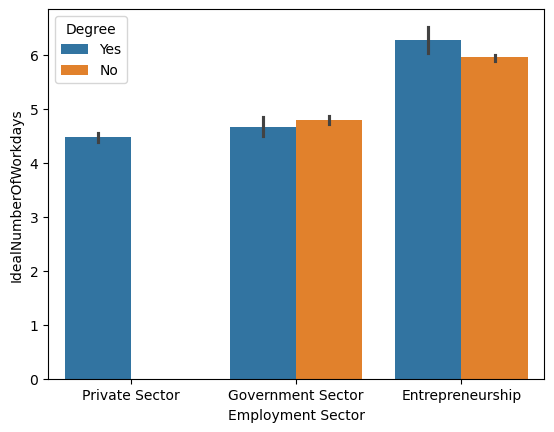

In [265]:
sns.barplot(x=df['Employment Sector'] ,y=df['IdealNumberOfWorkdays'], hue=df['Degree'])

In [267]:
#from the above chart it can be seen that student with degree prefer to have fewer than 5 workdays in a job but more than 6 Workdays in entrepreneurship

IdealYearlyIncome  Employment Background
1200K-1500K        Art                       27
                   Non-Technical             41
                   Technical                 34
600K-900K          Art                       12
                   Non-Technical             53
900K-1200K         Art                       14
                   Non-Technical            103
                   Technical                 45
More Than 1500K    Art                        9
                   Non-Technical             25
                   Technical                 37
Name: IdealYearlyIncome, dtype: int64

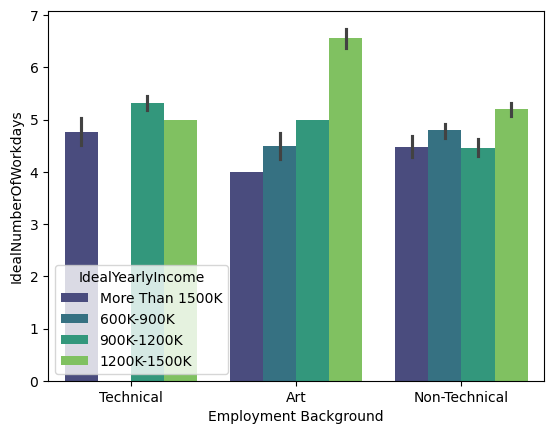

In [187]:
sns.barplot(x=df['Employment Background'] ,y=df['IdealNumberOfWorkdays'], hue=df['IdealYearlyIncome'], palette='viridis')
df.groupby(['IdealYearlyIncome', 'Employment Background'])['IdealYearlyIncome'].count()

In [183]:
#It can be seen that irrespective of the employment background, students with a high idealYearlyIncome opt for fewer Ideal number of Workdays.
#It can further be observed that none of the students willing to work in a technical background and prefer the ideal income to be in the range below 900k

<Axes: xlabel='Degree', ylabel='IdealNumberOfWorkdays'>

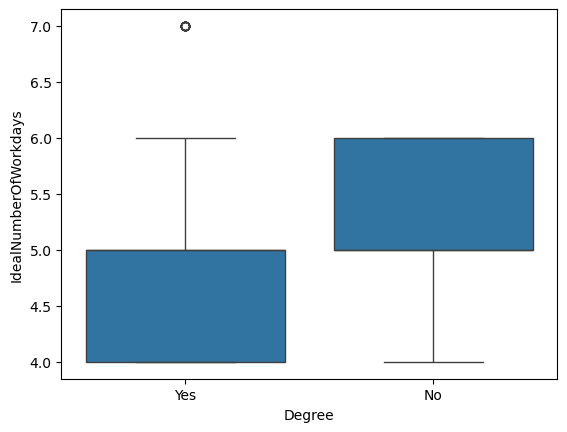

In [253]:
sns.boxplot(x=df['Degree'], y=df['IdealNumberOfWorkdays'])

In [185]:
#from the boxplot it can be drawn that students with degree prefer fewer Workdays than the students with no degrees

In [193]:
pd.crosstab(df['IdealYearlyIncome'], df['Employment Sector'])

Employment Sector,Entrepreneurship,Government Sector,Private Sector
IdealYearlyIncome,,,
1200K-1500K,35,33,34
600K-900K,3,30,32
900K-1200K,30,102,30
More Than 1500K,8,24,39


<Axes: xlabel='Employment Sector', ylabel='IdealYearlyIncome'>

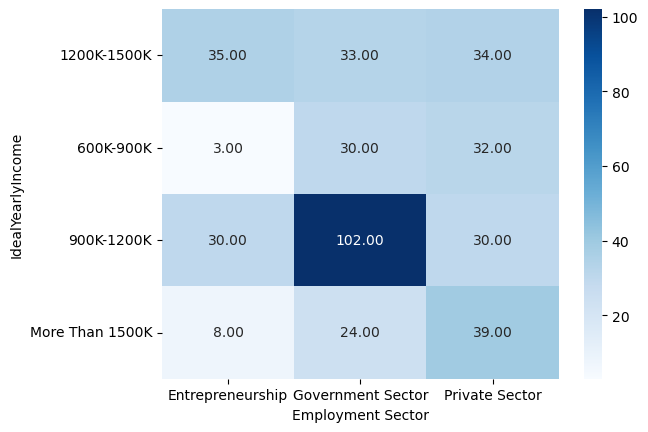

In [247]:
sns.heatmap(pd.crosstab(df['IdealYearlyIncome'], df['Employment Sector']), annot=True, fmt=".2f", cmap='Blues')

In [207]:
#From the above heatmap it can be analysed that ideal yearly income for majority of students preferring:
# Entrepreneurship is 1200k-1500k
#Government sector is 900k-1200k
#private sector is more than 1500k

<Axes: xlabel='Public Dealing', ylabel='IdealYearlyIncome'>

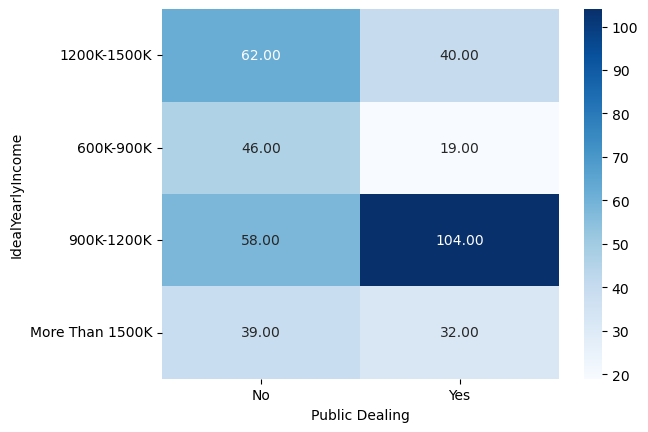

In [241]:
sns.heatmap(pd.crosstab(df['IdealYearlyIncome'], df['Public Dealing']), annot=True, fmt=".2f", cmap="Blues")

In [243]:
#From the above heatmap it can be analysed that the majority student who prefer dealing with public consider 900k-1200k to be ideal income, whereas
#the student who do not prefer dealing with public consider 1200k-1500k to be ideal income

In [271]:
#Modelling

In [275]:
df.sample(5)

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
267,Private Sector,Technical,No,Yes,5,1200K-1500K
115,Private Sector,Non-Technical,Yes,Yes,4,900K-1200K
99,Entrepreneurship,Non-Technical,No,No,6,900K-1200K
291,Entrepreneurship,Art,No,Yes,6,1200K-1500K
342,Government Sector,Technical,No,No,5,More Than 1500K


In [279]:
#Let our model predict that what would be the ideal yearly income for the students with the given inputs
#It would be a classification model since it is  a predicting a category

In [281]:
#Firstly, let's separate our data into input and output col

In [283]:
df_copy = df

In [285]:
df_copy

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4,More Than 1500K
1,Private Sector,Art,No,Yes,4,600K-900K
2,Government Sector,Technical,No,Yes,6,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4,900K-1200K
4,Private Sector,Technical,No,Yes,5,1200K-1500K
...,...,...,...,...,...,...
395,Private Sector,Non-Technical,No,Yes,5,600K-900K
396,Government Sector,Non-Technical,Yes,No,4,900K-1200K
397,Government Sector,Non-Technical,Yes,No,4,900K-1200K
398,Government Sector,Non-Technical,No,No,5,More Than 1500K


In [287]:
x= df_copy.iloc[:,0:-1]
x

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
0,Private Sector,Technical,No,Yes,4
1,Private Sector,Art,No,Yes,4
2,Government Sector,Technical,No,Yes,6
3,Government Sector,Non-Technical,Yes,Yes,4
4,Private Sector,Technical,No,Yes,5
...,...,...,...,...,...
395,Private Sector,Non-Technical,No,Yes,5
396,Government Sector,Non-Technical,Yes,No,4
397,Government Sector,Non-Technical,Yes,No,4
398,Government Sector,Non-Technical,No,No,5


In [289]:
y = df_copy.iloc[:,-1]
y

0      More Than 1500K
1            600K-900K
2           900K-1200K
3           900K-1200K
4          1200K-1500K
            ...       
395          600K-900K
396         900K-1200K
397         900K-1200K
398    More Than 1500K
399         900K-1200K
Name: IdealYearlyIncome, Length: 400, dtype: object

In [291]:
#Now splitting out data into train and test

In [293]:
from sklearn.model_selection import train_test_split

In [295]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

In [297]:
x_train

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
365,Entrepreneurship,Art,No,Yes,6
172,Government Sector,Technical,No,No,5
80,Government Sector,Non-Technical,Yes,No,4
94,Government Sector,Non-Technical,Yes,Yes,4
160,Government Sector,Non-Technical,Yes,Yes,4
...,...,...,...,...,...
188,Government Sector,Technical,No,No,5
58,Entrepreneurship,Non-Technical,Yes,No,6
240,Government Sector,Non-Technical,No,Yes,5
105,Entrepreneurship,Art,Yes,Yes,7


In [299]:
y_train

365        1200K-1500K
172         900K-1200K
80          900K-1200K
94          900K-1200K
160          600K-900K
            ...       
188    More Than 1500K
58          900K-1200K
240          600K-900K
105        1200K-1500K
309          600K-900K
Name: IdealYearlyIncome, Length: 340, dtype: object

In [301]:
x_test

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
318,Government Sector,Non-Technical,Yes,No,4
75,Entrepreneurship,Non-Technical,No,No,6
371,Government Sector,Non-Technical,Yes,No,5
50,Entrepreneurship,Technical,No,No,5
139,Entrepreneurship,Technical,Yes,No,6
325,Private Sector,Technical,No,Yes,5
87,Private Sector,Non-Technical,Yes,Yes,4
204,Government Sector,Non-Technical,Yes,No,5
294,Government Sector,Technical,No,No,5
310,Private Sector,Art,No,Yes,5


In [303]:
y_test

318         900K-1200K
75         1200K-1500K
371        1200K-1500K
50          900K-1200K
139    More Than 1500K
325        1200K-1500K
87          900K-1200K
204        1200K-1500K
294    More Than 1500K
310          600K-900K
76          900K-1200K
144        1200K-1500K
354        1200K-1500K
384    More Than 1500K
108         900K-1200K
66          900K-1200K
266         900K-1200K
135        1200K-1500K
52     More Than 1500K
90     More Than 1500K
378         900K-1200K
290         900K-1200K
254         900K-1200K
206         900K-1200K
95          900K-1200K
362         900K-1200K
373          600K-900K
153         900K-1200K
12     More Than 1500K
73     More Than 1500K
274         900K-1200K
121         900K-1200K
296         900K-1200K
0      More Than 1500K
142          600K-900K
120        1200K-1500K
33         1200K-1500K
3           900K-1200K
229        1200K-1500K
319         900K-1200K
298          600K-900K
193          600K-900K
24          900K-1200K
355        

In [305]:
x_test.shape

(60, 5)

In [307]:
y_test.shape

(60,)

In [309]:
#training the model

In [323]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
x_train_encoded = encoder.fit_transform(x_train)
print(x_train_encoded)

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [325]:
x_test_encoded = encoder.fit_transform(x_test)
print(x_test_encoded)

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0.

In [327]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train_encoded, y_train)

DecisionTreeClassifier()

In [337]:
#predicting the values
y_pred = model.predict(x_test_encoded)
y_pred 

array(['900K-1200K', '900K-1200K', '1200K-1500K', '900K-1200K',
       'More Than 1500K', '1200K-1500K', '900K-1200K', '1200K-1500K',
       '900K-1200K', '600K-900K', '900K-1200K', '1200K-1500K',
       '1200K-1500K', 'More Than 1500K', '900K-1200K', '900K-1200K',
       '900K-1200K', '1200K-1500K', 'More Than 1500K', 'More Than 1500K',
       '900K-1200K', '1200K-1500K', '900K-1200K', '900K-1200K',
       '900K-1200K', '900K-1200K', '900K-1200K', '900K-1200K',
       '900K-1200K', 'More Than 1500K', '900K-1200K', '900K-1200K',
       '900K-1200K', 'More Than 1500K', '900K-1200K', '900K-1200K',
       '1200K-1500K', '900K-1200K', '1200K-1500K', '900K-1200K',
       '900K-1200K', '600K-900K', '900K-1200K', '1200K-1500K',
       '900K-1200K', '900K-1200K', '900K-1200K', '900K-1200K',
       '900K-1200K', '1200K-1500K', '900K-1200K', '900K-1200K',
       '900K-1200K', '1200K-1500K', '1200K-1500K', '900K-1200K',
       '900K-1200K', '900K-1200K', 'More Than 1500K', '1200K-1500K'],
      d

In [341]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

78.33333333333333

In [343]:
#so accuracy of the model is 78.33 %
#the model predics that what would be the ideal yearly income preferred by the student with specific job interests